In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from termcolor import colored

In [3]:
df = pd.read_csv("/content/Admission_Predict (1).csv")

In [4]:
df.drop(columns=['Serial No.'], inplace=True)

In [5]:
print(df.columns)  # This will show all column names


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [6]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Remove any trailing spaces



In [7]:
# Convert 'Chance of Admit' into a binary classification
df['Admit_Class'] = (df['Chance of Admit'] >= 0.75).astype(int)


In [8]:
# Define features and target
X = df.drop(columns=['Chance of Admit', 'Admit_Class'])
y = df['Admit_Class']


In [9]:
# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)


In [13]:
# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(colored("Confusion Matrix:\n", "cyan"), conf_matrix)


Confusion Matrix:
 [[42  5]
 [ 2 31]]


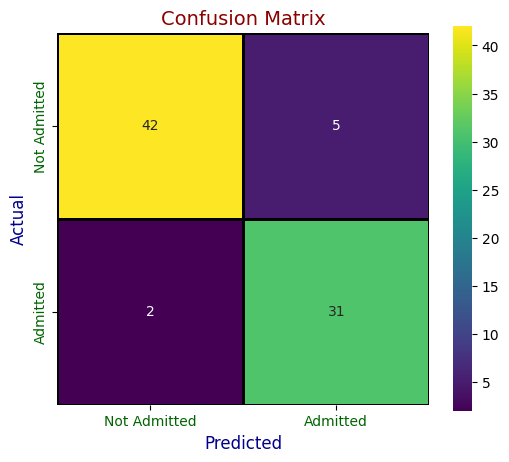

In [14]:
# Visualize Confusion Matrix with Enhanced Colors
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=1, linecolor='black', cbar=True, square=True, xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel('Predicted', fontsize=12, color='darkblue')
plt.ylabel('Actual', fontsize=12, color='darkblue')
plt.title('Confusion Matrix', fontsize=14, color='darkred')
plt.xticks(color='darkgreen')
plt.yticks(color='darkgreen')
plt.show()


In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [16]:
print(colored(f"Accuracy: {accuracy:.2f}", "green"))
print(colored(f"Precision: {precision:.2f}", "blue"))
print(colored(f"Recall: {recall:.2f}", "yellow"))
print(colored(f"F1 Score: {f1:.2f}", "magenta"))



Accuracy: 0.91
Precision: 0.86
Recall: 0.94
F1 Score: 0.90
